## Gradient Boosting


实现用梯度下降实现一个线性回归，没想到这么费劲。
实现中出现的问题：

1. 对于参数 $\theta_0$ 的更新公式没有记住。要是手动推导一遍就知道了，太理所当然了。
2. 学习率不能太长了，不然不会收敛。

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [247]:
def loadData(file='curve80.txt'):
    fr = open(file)
    x = []
    y = []
    for line in fr.readlines():
        data = line.strip().split()
        x.append(float(data[0]))
        y.append(float(data[1]))
        
    fr.close()
    return x,y

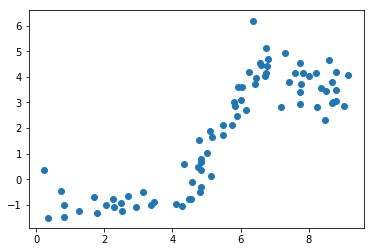

In [248]:
x, y = loadData()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)

In [249]:
# 简单的线性回归

class GradientDescent(object):
    def __init__(self):
        return
    def model(self, X, y, alpha = 0.1, iters = 20):
        m, n = X.shape
        thetas = np.zeros((n, 1))
        errors = []
        
        for i in range(iters):
            dy = np.dot(X, thetas) - y
            thetas[1] = thetas[1] - (alpha / m) * np.dot(X[:,:-1].T, dy)
            thetas[0] = thetas[0] - (alpha / m) * sum(dy)
            errors.append(sum((np.dot(X, thetas) - y) ** 2)[0] / m)
        return thetas, errors

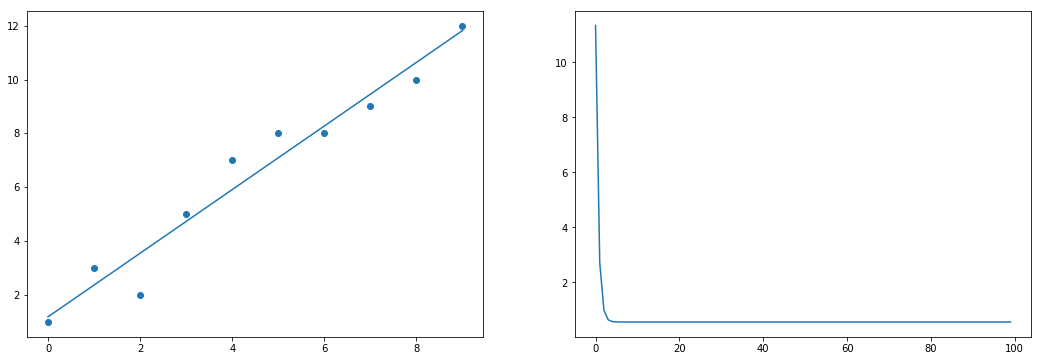

In [250]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
m = len(x)
X = np.array(x).reshape(m, 1)
y = np.array(y).reshape(m, 1)
X = np.insert(X, 0, 1, axis = 1)

fig = plt.figure(figsize=(18,6))

iters = 100
gd = GradientDescent()
thetas, errors = gd.model(X, y, 0.1, iters)

# plot 
ax = fig.add_subplot(121)
ax.scatter(x, y)
x1 = np.arange(0, 10, 1)
y2 = x1 * thetas[1] + thetas[0]
ax.plot(x1, y2)

# plot the error
ax = fig.add_subplot(122)
ax.plot(range(iters), errors)



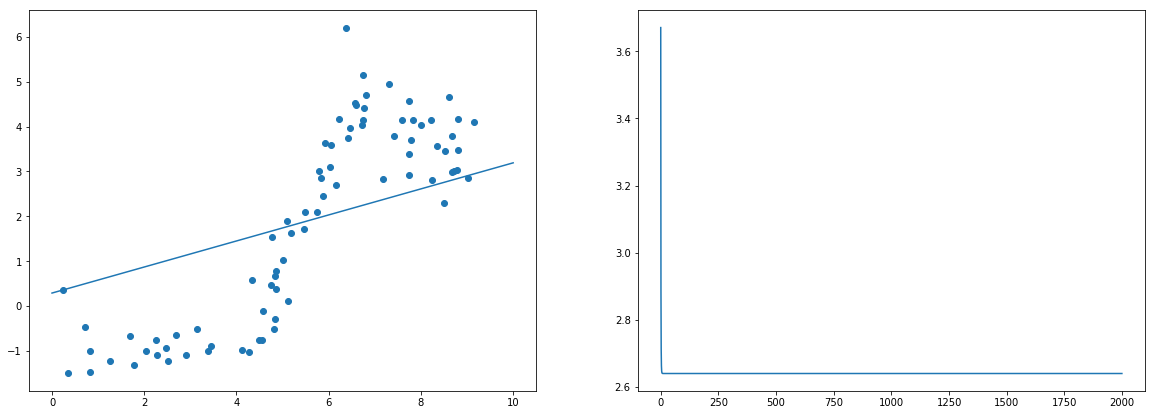

In [251]:
x, y = loadData()
m = len(x)
X = np.array(x).reshape(m, 1)
y = np.array(y).reshape(m, 1)
X = np.insert(X, 0, 1, axis = 1)

iters = 2000
gd = GradientDescent()
thetas,errors = gd.model(X, y, 0.1, iters)

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(x, y)

x1 = np.linspace(0, 10, 200)
y1 = x1 * thetas[1] + thetas[0]
ax.plot(x1, y1)

ax = fig.add_subplot(122)
ax.plot(range(iters), errors)
# ax = fig.add_subplot(212)
# ax.scatter(x, y)


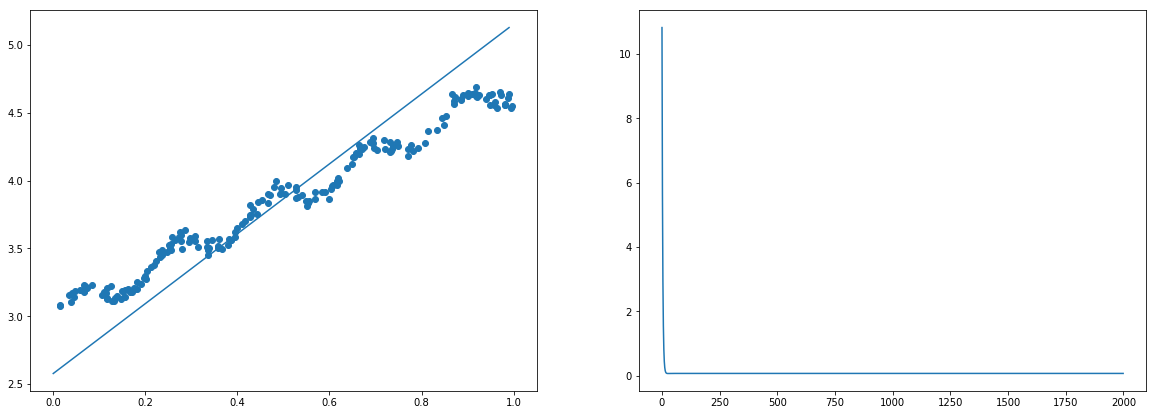

In [252]:
x, y = loadData('ex01.txt')
m = len(x)
X = np.array(x).reshape(m, 1)
y = np.array(y).reshape(m, 1)
X = np.insert(X, 0, 1, axis = 1)
iters = 2000
gd = GradientDescent()
thetas,errors = gd.model(X, y, 0.1, iters)

# plot the data and line
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(x, y)

x1 = np.arange(0, 1, 0.01)
y1 = thetas[1] * x1 + thetas[0]
ax.plot(x1, np.squeeze(np.asarray(y1)))

# plot the error
ax = fig.add_subplot(122)
ax.plot(range(iters), errors)

